# Lending Club Case Study:

- Define Problem Statement
- Background - why is it important to solve this problem
- Approach to solve this

Noted from session:
remove the 'Current' applicaants
remove loan behavior variable as they are not available at application


### Import libraries


In [1]:
#Importing libraries needed for this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.) Data Sourcing / Gathering & Understanding:

In [2]:
#extract data from csv file
loan_df = pd.read_csv('loan.csv')
loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

C:\Users\Yukay\anaconda3\envs\myEnv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)

In [3]:
#inspect sample rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Refer to data dictionary to decide which columns are needed and which can be removed
 - list of columns, data dictionary definition

In [4]:
#Remove data not in scope of our analysis
post_loan_data_points = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int'
                         ,'total_rec_late_fee','pymnt_plan','out_prncp','out_prncp_inv'
                        ,'last_pymnt_d','last_pymnt_amnt']

loan_df.drop(labels = post_loan_data_points, axis =1, inplace = True)

loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 101)

In [5]:
# target variables of interest
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [6]:
loan_df = loan_df[loan_df.loan_status !='Current']
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## 2.) Data Handling & Cleaning
 - data cleaning: missing vaslues, tratment, check high % of missing values, drop rows, clumns, impute (try to explain in documentation so the grader can understand)
 - outliers, treatment,
 - derived variables, transformations, % metrics?\
 - data types

In [7]:
#check columns and null counts
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 101 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              38577 non-null  int64  
 1    member_id                       38577 non-null  int64  
 2    loan_amnt                       38577 non-null  int64  
 3    funded_amnt                     38577 non-null  int64  
 4    funded_amnt_inv                 38577 non-null  float64
 5    term                            38577 non-null  object 
 6    int_rate                        38577 non-null  object 
 7    installment                     38577 non-null  float64
 8    grade                           38577 non-null  object 
 9    sub_grade                       38577 non-null  object 
 10   emp_title                       36191 non-null  object 
 11   emp_length                      37544 non-null  object 
 12   home_ownership  

**Finding:** There are several columns which have 0 non-null values

In [8]:
#Removing columns with 0 non null values
loan_df.dropna(axis = 1, how = 'all',inplace = True)

#Removing rows with 0 non null values
loan_df.dropna(axis = 0, how = 'all',inplace = True)

#Checking after removing
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [9]:
# % of missing values values
pd.DataFrame(loan_df.isna().mean().round(4)*100).sort_values(by=0, ascending = False)

,0
mths_since_last_record,92.90
mths_since_last_delinq,64.56
desc,32.47
emp_title,6.19
emp_length,2.68
pub_rec_bankruptcies,1.81
chargeoff_within_12_mths,0.15
collections_12_mths_ex_med,0.15
revol_util,0.13
tax_liens,0.10


Finding: next_pymnt_d, mths_since_last_record, mths_since_last_delinq colums have high % of missing values, hence removing them

In [10]:
#Removing the above three columns
loan_df.drop(labels =['mths_since_last_record', 'mths_since_last_delinq'], axis=1,inplace=True)

In [11]:
#Checking after removing
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [12]:
# % of missing values values
pd.DataFrame(loan_df.isna().mean().round(4)*100).sort_values(by=0, ascending = False)

,0
desc,32.47
emp_title,6.19
emp_length,2.68
pub_rec_bankruptcies,1.81
chargeoff_within_12_mths,0.15
collections_12_mths_ex_med,0.15
revol_util,0.13
tax_liens,0.10
title,0.03
last_credit_pull_d,0.01


### Missing Data

Missing data is in these columns:
 - desc
 - emp_title 
 - emp_length
 - pub_rec_bankruptcies 
 - collections_12_mths_ex_med 
 - chargeoff_within_12_mths 
 - revol_util 
 - tax_liens 
 - title 
 - last_credit_pull_d 


In [17]:
#
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [18]:
loan_df.emp_length.isna().sum()

1033

In [20]:
#Replace the nulls with the Mode
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0])

#check
loan_df.emp_length.isna().sum()

0

In [22]:
#check
loan_df.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [27]:
#
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
loan_df.pub_rec_bankruptcies.isna().sum()

697

In [28]:
#Replace the nulls with the Mode
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0])

#check
loan_df.pub_rec_bankruptcies.isna().sum()

0

In [29]:
#
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

# 3.) Exploratory Analysis & Data Visualisation 
- univariates,
- bivariates, 
- derived variables, 
- % metric,
- types of visuals

In [37]:
# Target variable
loan_df['Default_flag'] = loan_df.loan_status.apply(lambda x : 1 if x == 'Charged Off' else 0)
#check
loan_df.Default_flag.value_counts()

0    32950
1     5627
Name: Default_flag, dtype: int64

In [38]:
# Target variable Yes/No
loan_df['Default_YesNo'] = loan_df.loan_status.apply(lambda x : 'Yes' if x == 'Charged Off' else 'No')
#check
loan_df.Default_YesNo.value_counts()

No     32950
Yes     5627
Name: Default_YesNo, dtype: int64

C:\Users\Yukay\anaconda3\envs\myEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


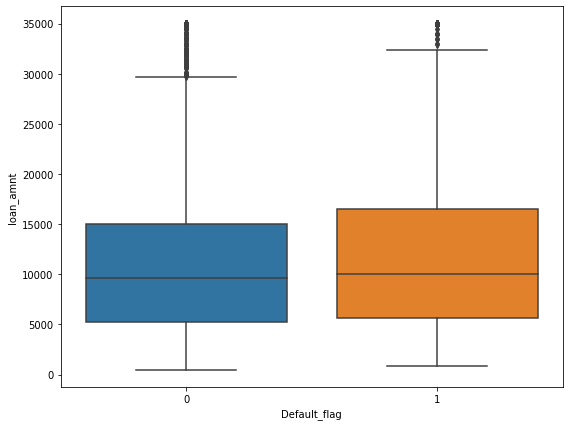

In [42]:
plt.figure(figsize=[9,7])
sns.boxplot(loan_df['Default_flag'],loan_df['loan_amnt'])
plt.show()

In [48]:
#deafult rate
loan_df.groupby('emp_length').Default_flag.mean().round(4)*100

emp_length
1 year       14.39
10+ years    16.37
2 years      13.21
3 years      13.83
4 years      13.82
5 years      14.34
6 years      14.16
7 years      15.37
8 years      14.15
9 years      12.89
< 1 year     14.17
Name: Default_flag, dtype: float64

## 4.) Findings/Results/Insights/Summary/Recommendations